# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

## Data Overview

- Observations
- Sanity checks

In [2]:
visa = pd.read_csv("EasyVisa.csv") #import data

In [3]:
# to view a sample of the data and to set the ramdom_state so we will see the same samples every time running this code
visa.sample(10, random_state = 1)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17639,EZYV17640,Asia,Bachelor's,Y,N,567,1992,Midwest,26842.9100,Year,Y,Certified
23951,EZYV23952,Oceania,Bachelor's,N,N,619,1938,Midwest,66419.9800,Year,Y,Certified
8625,EZYV8626,Asia,Master's,N,N,2635,2005,South,887.2921,Hour,Y,Certified
20206,EZYV20207,Asia,Bachelor's,Y,Y,3184,1986,Northeast,49435.8000,Year,Y,Certified
7471,EZYV7472,Europe,Bachelor's,Y,N,4681,1928,West,49865.1900,Year,Y,Denied
3433,EZYV3434,Asia,Bachelor's,Y,N,222,1989,South,813.7261,Hour,Y,Certified
24440,EZYV24441,Europe,High School,N,Y,3278,1994,South,204948.3900,Year,Y,Denied
12104,EZYV12105,Asia,Master's,Y,N,1359,1997,West,202237.0400,Year,N,Certified
15656,EZYV15657,Asia,Bachelor's,N,N,2081,2003,West,111713.0200,Year,Y,Denied
23110,EZYV23111,North America,Bachelor's,Y,N,854,1998,Northeast,444.8257,Hour,Y,Denied


In [4]:
# checking the shape of the data
print("There are", visa.shape[0], "rows and there are", visa.shape[1], "columns.")

There are 25480 rows and there are 12 columns.


In [5]:
visa.info() #to return information on columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* For Dtype, there are here are 9 objects, 2 ints, and 1 float

In [6]:
visa.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


* `no_of_employees` has 5,667 persons as mean, 2,109 as median with minimum at -26 persons and maximun at 602,069. The range is extremely large. At least 75% of employers have number of employees less than 3,600. Since the minimum number of employees is in a negative number, we will do more investigation on it.
* `yr_of_estab` has mean at 1979, median at 1997, minimum at 1800 and maximum at 2016. Most of employers were established in late 1900s. 
* `prevailing_wage`, mean is 74,456 dollars, median is 70,308 dollars, with 2 dollars as minimum and 319,210 dollars as maximun. Again, the range is extremely large. We will investigate it more. 

In [7]:
visa.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

No missing value

In [8]:
print('There is',visa.duplicated().sum(), 'duplication(s).')

There is 0 duplication(s).


In [9]:
data = visa.copy() #to copy file so we can keep original data unchanged.

In [10]:
#for feature in data.columns: 
    #if creditData[feature].dtype == 'object': 
        #creditData[feature] = pd.Categorical(creditData[feature])# Replace strings with an integer
#creditData.head(10)

for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature]) # Replace strings with an integer
data.info() #to check Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


In [11]:
data.nunique() # to check for number of unique values

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

* There are 25480 uniquely `case_id`. Therefore, we decided to drop the case_id since each case was assigned as an individual number. It won't add anything to the models.
* There are 6 continents, 4 education levels, 5 regions of employment and 4 unit of wage.
* `has_job_experience`, `requires_job_training`, `full_time_position`, and `case_status` have 2 types of values.

In [12]:
data = data.drop('case_id', axis=1) #to drop case_id column 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Number of employees in the employer's company

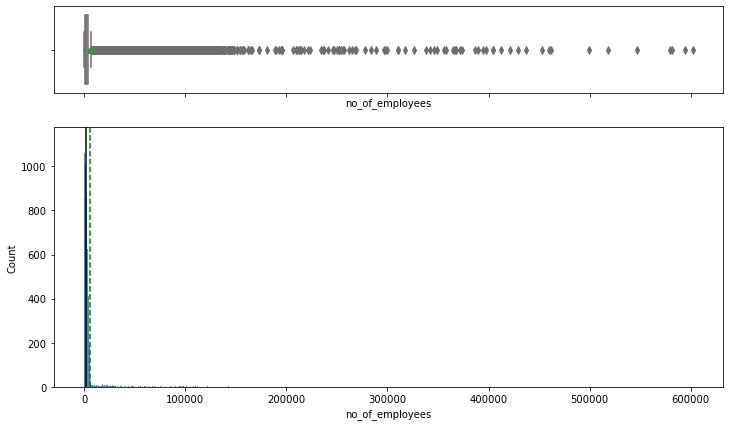

In [14]:
histogram_boxplot(data, "no_of_employees")

In [15]:
print("Employers' number of employees is rage from", data.no_of_employees.min(), "to", data.no_of_employees.max(),".")

Employers' number of employees is rage from -26 to 602069 .


* `no_of_empoyees` has an extream right-skewed with a range from -26 to 602069 with mean and median close to 0. 
* There are a large range of outliers. 
* We will look into negative number of employees.
* We will review the outliers in the bivariate analysis section.

In [16]:
data[data["no_of_employees"]<= 0]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [17]:
data[data["no_of_employees"]<= 0].value_counts().sum()

33

* There are 33 cases that have negative numbers of employees. A company should have at least 1 employee therefore these values do not make sense. Since 30 cases is very small amount in this data set, we decide to remove them from the data set.

In [18]:
data.drop(data[data["no_of_employees"]<= 0].index, inplace = True) # remove rows which have a negative number of employees

### Year the employer's company was established

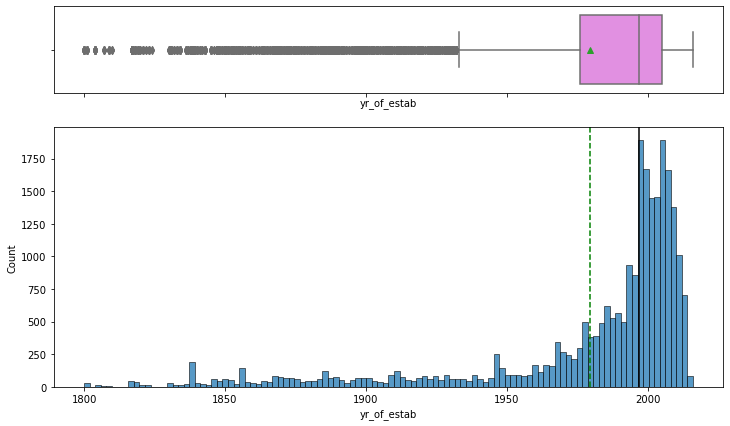

In [19]:
histogram_boxplot(data, "yr_of_estab")

* The distribution of `yr_of_estab` is a highly left skewed with median close to the 21st century.  
* A large range of outliers from 1800 to around 1940.
* We will explore these data more in the bivariate analysis section

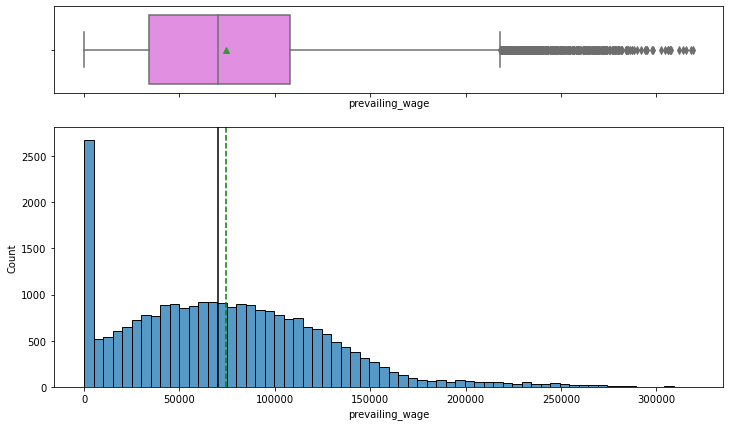

In [20]:
histogram_boxplot(data, "prevailing_wage")

* The `prevailing_wage` distribution is skewed to right with a lot of outliers.
* Mean, ~75000 dollars, is slightly higher than medien, ~70000 dollars. 
* There are very high counts of small `prevailing_wage`, assuming there are hourly rates or weekly rates.
* We will assign any `prevailing_wage` value which is higher than 300,000 dollars to the upper whisker value.

In [21]:
# Calculating the 25th quantile
Q1 = data["prevailing_wage"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["prevailing_wage"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
print("Upper Whisker is", Upper_Whisker, "dollars.")

Upper Whisker is 218289.9475 dollars.


In [22]:
# assigning the outliers the value of upper whisker
data.loc[data["prevailing_wage"] >= 300000, "prevailing_wage"] = Upper_Whisker

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Continent

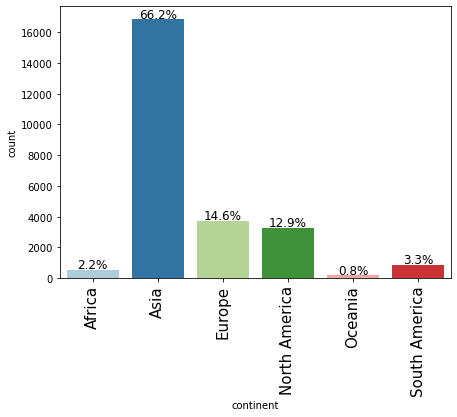

In [24]:
labeled_barplot(data, "continent",perc=True)

* 66% of application were from Asia. 
* Followed by Europe 14.6% abd North America 12.9%.
* Oceania has the least application, 0.8%

### Employee Education

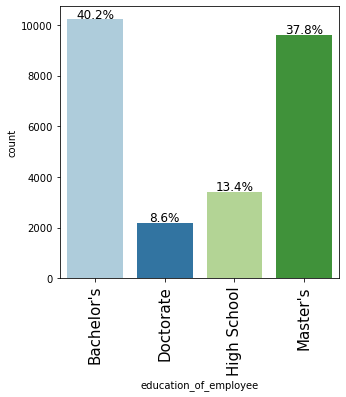

In [25]:
labeled_barplot(data, "education_of_employee",perc=True)

* Most of applications are Bechelor's degree, 40.2%, and Master's, 37.8%.
* Higher school, 13.4%, and Doctorate degree, the least, 8.6%
* Most employees have need for candicates who have at least Bachelor's degree.

### Job Experience

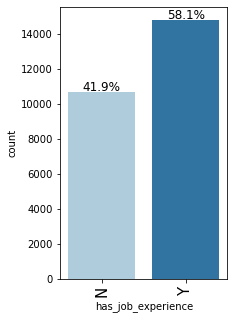

In [26]:
labeled_barplot(data, "has_job_experience",perc=True)

* More than half of empolyeers prefers candicates who have work experience, 58.1%.
* However, there is 41.9% of positions which do not require work experience.

### Job Training Requirement 

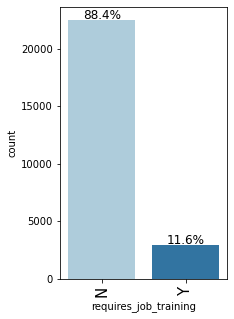

In [27]:
labeled_barplot(data, "requires_job_training",perc=True)

* 88.4% of positions does not require job training but only 11.6% does.

### Region of Employment

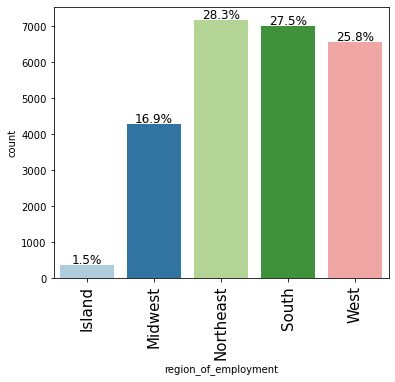

In [28]:
labeled_barplot(data, "region_of_employment",perc=True)

* From 5 regions, the top 3 reqion of employment were quite close. First is Northeast 28.2%, secound South, 27.5%, and West 25.8%
* Midwest is 16.9% and Island is 1.5%.
* Northeast, South, and West have great number of immigrations in general.

### Unit Of Wage

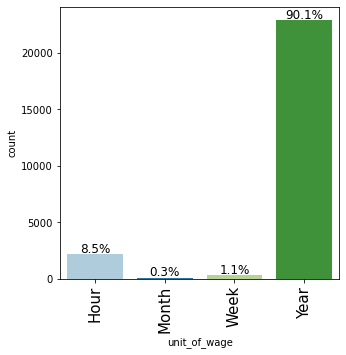

In [29]:
labeled_barplot(data, "unit_of_wage",perc=True)

* Most of positions/applications, 90.1%, were paid annually. 
* Hourly rate is 8.5%, Monthly 0.3%, and Weekly 1.1%.

### Full Time Position

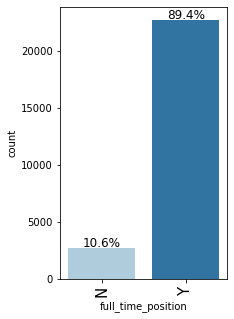

In [30]:
labeled_barplot(data, "full_time_position",perc=True)

* Most of the appllications, 89.4%, were full-time positions.

### Case Status

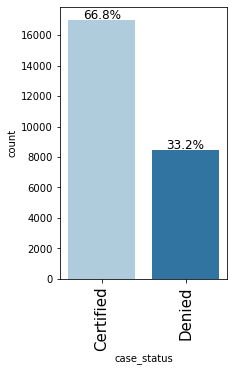

In [31]:
labeled_barplot(data, "case_status",perc=True)

* 66.8% of the visa applications were certified and 33.2% were denied.

### Bivariate analysis

In [32]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [33]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Case Status and Education

#### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

case_status            Certified  Denied    All
education_of_employee                          
All                        17001    8446  25447
Bachelor's                  6362    3858  10220
High School                 1164    2252   3416
Master's                    7565    2057   9622
Doctorate                   1910     279   2189
------------------------------------------------------------------------------------------------------------------------


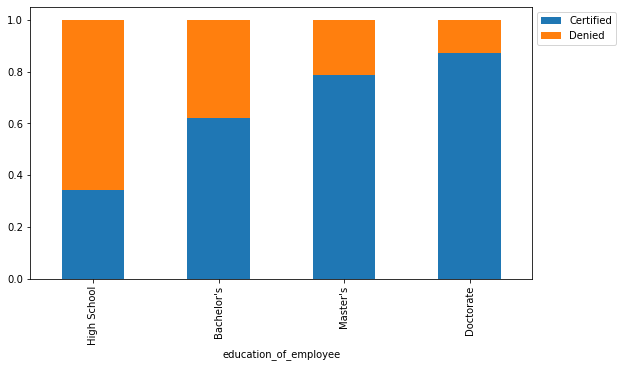

In [34]:
stacked_barplot(data, "education_of_employee", "case_status")

* Master's degree has the highest certified numbers, over 7565 cases, followed by Bachelor's, over 6362 cases, Doctorate 1910 case, and High School 1164 cases.
* Doctorate has the highest approval rate at ~90%, followed by Master's ~80%, Bachelor's over 60%, and High School over 30%.
* Doctorate has the highest certified rate while Bachelor's has the hgihest certified cases.
* High School has the lowest certified rate and the lowest approve number of cases.

### Case Status and Continents

#### 2. How does the visa status vary across different continents? 

case_status    Certified  Denied    All
continent                              
All                17001    8446  25447
Asia               11001    5839  16840
North America       2037    1250   3287
Europe              2953     774   3727
South America        492     359    851
Africa               396     154    550
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


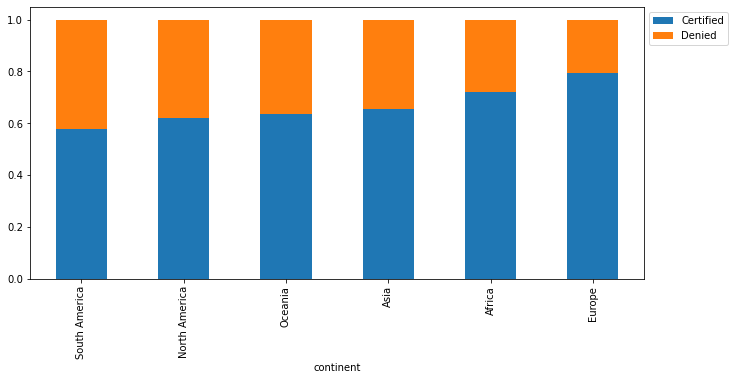

In [35]:
stacked_barplot(data, "continent", "case_status")

* All continents have a higher number of Certified cases than Denied cases.
* Asia has the highest certified cases at 11001 cases, followed by Europe 2953 cases, North America 2037 cases, South America 492 cases, Africa 396 cases, and Oceania 122 cases.
* Europ has the highest approval rate ~80%, followed by Africa over 70%, Asia ~65%, Oceania ~63%, North America ~62%, and Sounth America less than 60%.
* Asia has the highest certified cases while Europe has the highest certified rate.

### Case Status and Region of Employment

case_status           Certified  Denied    All
region_of_employment                          
All                       17001    8446  25447
Northeast                  4524    2665   7189
West                       4097    2481   6578
South                      4908    2098   7006
Midwest                    3246    1053   4299
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


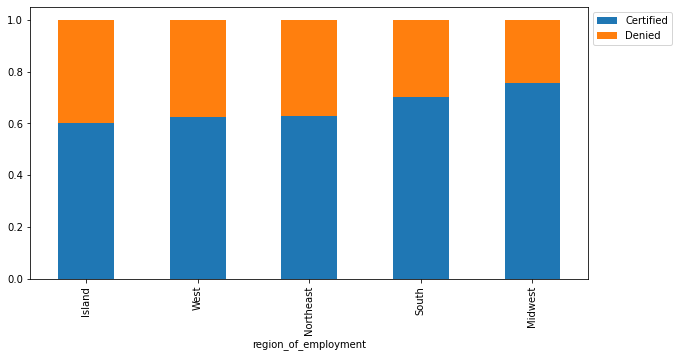

In [36]:
stacked_barplot(data, "region_of_employment", "case_status")

* Observation

### Case Status and Work Experience

#### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


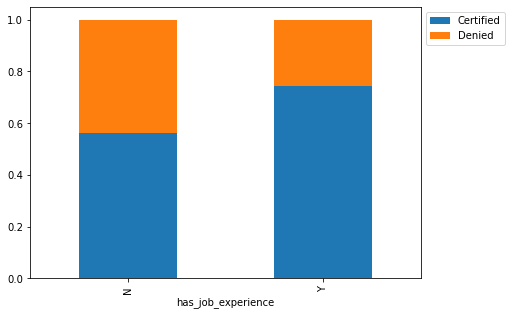

In [37]:
stacked_barplot(data, "has_job_experience", "case_status")

* Applications with work experience were certified 11015 case or over 70% while applications with no working experience were certified 5986 cases or ~55%.

### Case Status and Employment Paid Intervals

#### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Year              16030    6903  22933
Hour                747    1406   2153
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


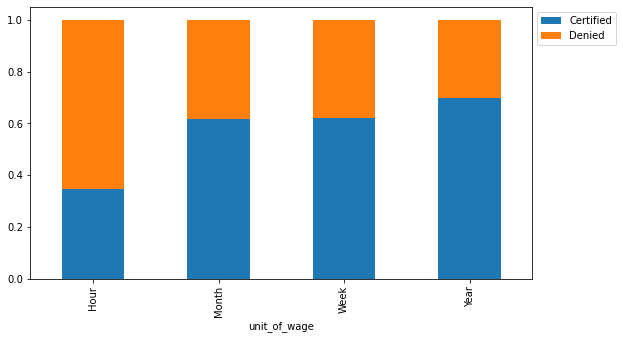

In [38]:
stacked_barplot(data, "unit_of_wage", "case_status")

* The cases which has Annually employment paid interval have the highest certified cases at 16030 or ~70% approval rate.
* Weely paid interval and Monthly pain interval have over 60% approval rate.
* Hourly has the least approval rate ~35%.

### Case Status and Prevailing Wage

#### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

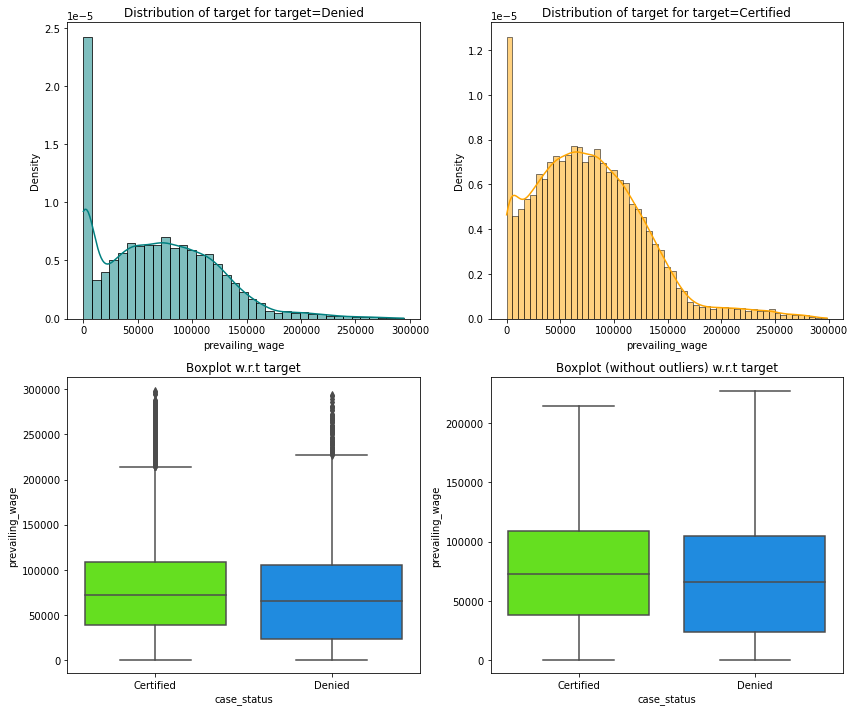

In [39]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

* Observation

### Case Status and Full-Time Employment

case_status         Certified  Denied    All
full_time_position                          
All                     17001    8446  25447
Y                       15146    7595  22741
N                        1855     851   2706
------------------------------------------------------------------------------------------------------------------------


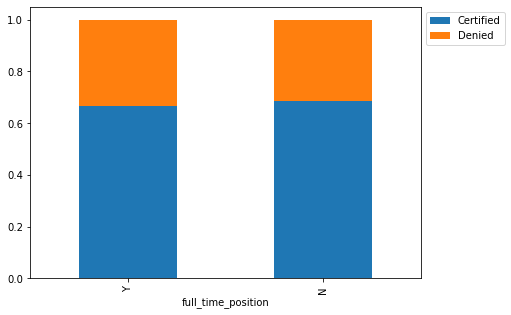

In [40]:
stacked_barplot(data, "full_time_position", "case_status")

* Observation

### Case Status and Job Training 

case_status            Certified  Denied    All
requires_job_training                          
All                        17001    8446  25447
N                          15000    7498  22498
Y                           2001     948   2949
------------------------------------------------------------------------------------------------------------------------


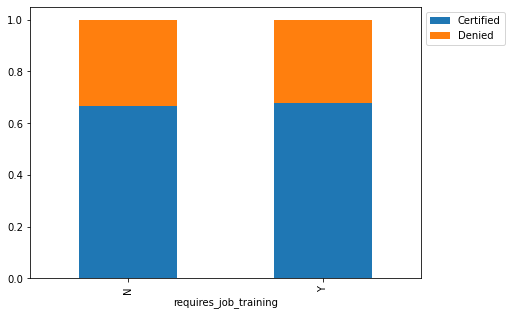

In [41]:
stacked_barplot(data, "requires_job_training", "case_status")

* Observation

### Case Status and Year of Employeer's was Established

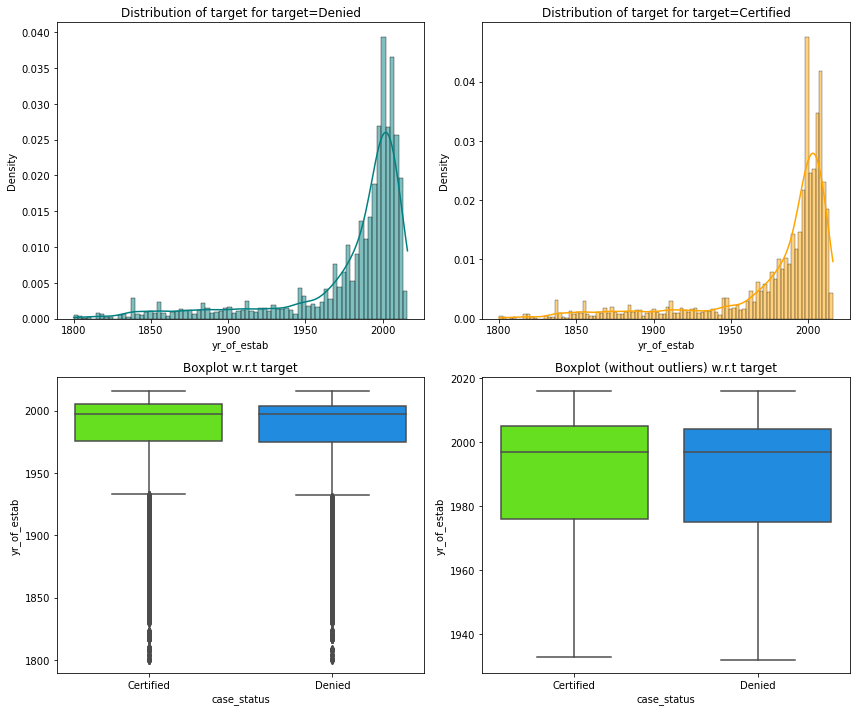

In [42]:
distribution_plot_wrt_target(data, "yr_of_estab", "case_status")

* Observation

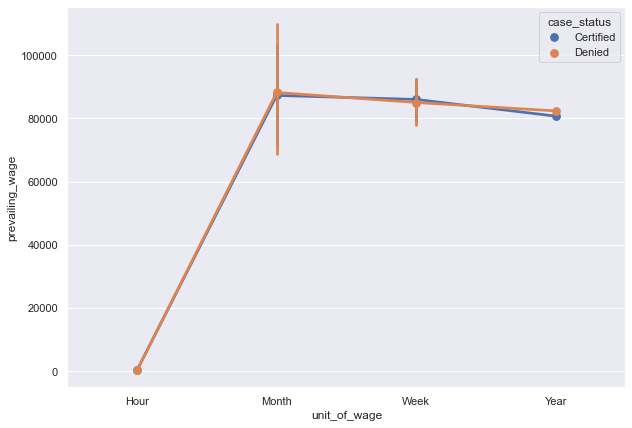

In [43]:
sns.set(rc={'figure.figsize':(10,7)})
sns.pointplot(data = data, x = 'unit_of_wage', y = 'prevailing_wage', hue = 'case_status');

* Case statuses as certified and as denied have very similar prevalling wages in hourly wage, monthly wage, weekly rage and annully rate. 
* However, the denied case with monthly paid group has a larger range of prevaling wage than other group. 

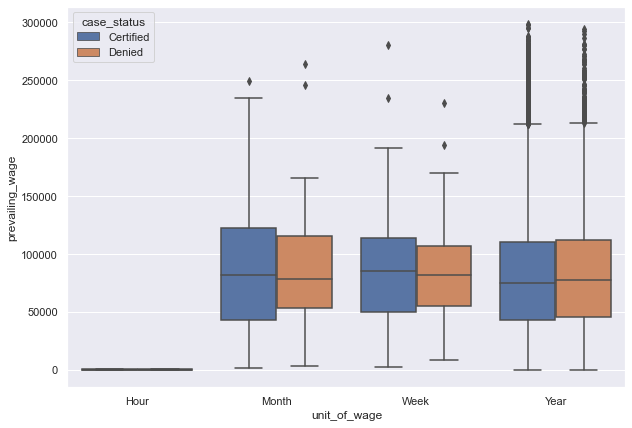

In [44]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(data = data, x = 'unit_of_wage', y = 'prevailing_wage', hue = 'case_status');

* Observation

### Continent and Prevailing Wage

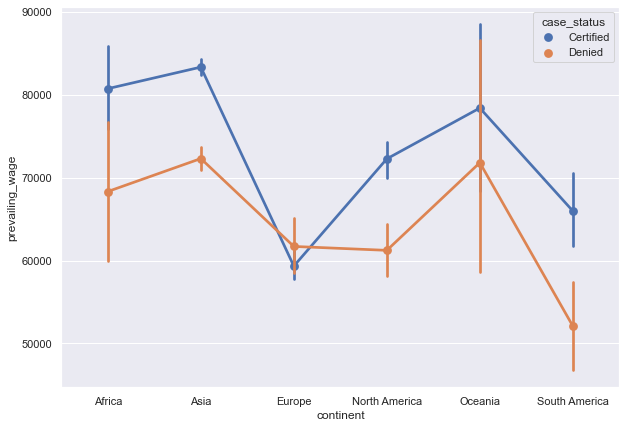

In [45]:
sns.set(rc={'figure.figsize':(10,7)})
sns.pointplot(data = data, x = 'continent', y = 'prevailing_wage', hue = 'case_status');

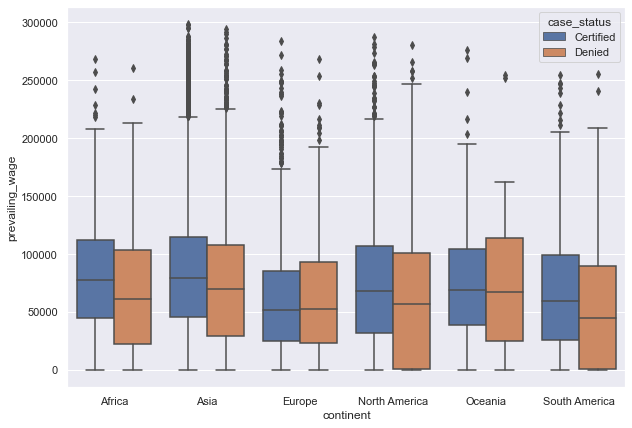

In [46]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(data = data, x = 'continent', y = 'prevailing_wage', hue = 'case_status');

### Work Experience and Prevailing Wage

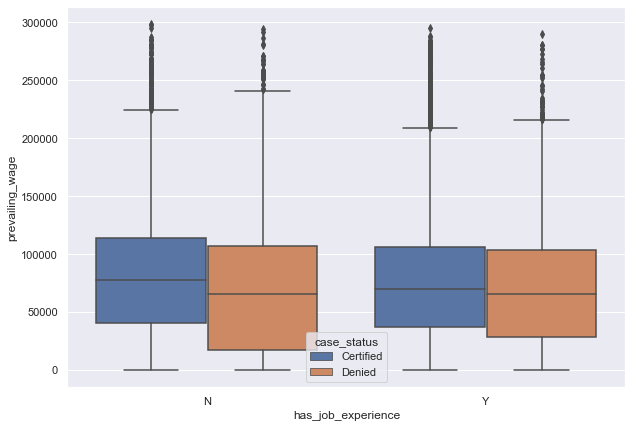

In [47]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(data = data, x = 'has_job_experience', y = 'prevailing_wage', hue = 'case_status');

* Observation

### Training and Prevailing Wage

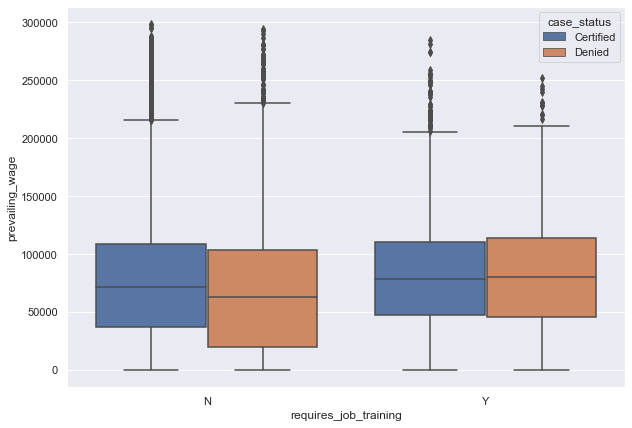

In [48]:
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(data = data, x = 'requires_job_training', y = 'prevailing_wage', hue = 'case_status');

* Observation

### Case Status, Number of Employees, and Employment Paid Interval

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(data = data, x = 'unit_of_wage', y = 'no_of_employees', hue = 'case_status');

* For Weekly paid interval, 
* For Annually paid interval, 

### Case Status and Number of Employees

In [ ]:
distribution_plot_wrt_target(data, "no_of_employees", "case_status")

* Observation

### Case Status and Year of Establishment 

### Binning

In [ ]:
print("Employers' year of establish is range from", data.yr_of_estab.min(), "to", data.yr_of_estab.max(),".")

In [ ]:
# binning
binned_year = pd.cut(data["yr_of_estab"], [1800, 1850, 1900, 1950, 2000, 2050])
binned_year.head()  # to return first 5 rows

In [ ]:
# to return number of units per each catergory
binned_year.value_counts()

In [ ]:
# add custom labels and categorize establish year into 5 catergories
data["yr_of_estab_bin"] = pd.cut(
    data["yr_of_estab"],
    [1800, 1850, 1900, 1950, 2000, 2050],
    labels=["1800-1850", "1851-1900", "1901-1950", "1951-2000", "2001+"],
)

In [ ]:
stacked_barplot(data, "yr_of_estab_bin", "case_status")

* Observation

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})
sns.pointplot(data = data, x = 'yr_of_estab_bin', y = 'prevailing_wage', hue = 'case_status');

* Observation

#### Let's encode visa to be certified as 1 and denied as 0 for further analysis

In [ ]:
data["case_status"] = data["case_status"].apply(
    lambda x: 1 if x == "Denied" else 0
) #to classify 'Certified' as 0 and 'Denied' as 1. 

In [ ]:
# to change Dtyoe of `case_status` to int
data['case_status'] = data['case_status'].astype(int)

In [ ]:
data.info() # to check dtype

In [ ]:
data.case_status.value_counts() # to return how many cases were certified and were denide.

In [ ]:
# to create a data set that only has number (int or float) as Dtype
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7)) #to return heatmap graph from the cols_list data set 
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* Observation

In [ ]:
sns.pairplot(data=data, hue="case_status")

* Observation

## Insight of EDA

* a
* b
* c

## Building bagging and boosting models

## Model Building - Approach
1. Data preparation
2. Split the data into the train and test set.
3. Train models on the training data.
4. Try to improve the model performance using hyperparameter tuning.
5. Test the performance on the test data.

## Split Data

In [ ]:
data.drop('yr_of_estab', axis=1, inplace=True) #to drop yr_of_estab column. We will only use 'yr_of_estab_bin'.
X = data.drop('case_status', axis=1) #to drop 'case_status' from X
Y = data['case_status']

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

## Model evaluation criterion

### The model can make wrong predictions as:
1. Predicting a visa application is certified when it is denied.
2. Predicting a visa application is denied when it is certified.

### Which case is more important? 
1. If the model predicts a visa application is certified when it is denied then OFLC would loss resources to process a case that is not qualified. In addition, usually there is a limited number of cases that could be approved. This spot would not be utilized for a qualified candidate. 
2. If the model predicts a visa application is denied when it is certified then OFLC would not provide enough resources on a candidate who is qualified and the employer would lost a quality employee. 

### Which metric to optimize?
* We would want Recall score to be maximized, the greater the F1-Score higher the chances of predicting the certified class correctly.

**Let's define a function to provide metric scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Classifier

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

* The decision tree is overfitting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning

In [ ]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

observation

## Random Forest Classifier

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

observation

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

observation

## Bagging Classifier

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

observation

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

observation

## AdaBoost Classifier

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [ ]:
observation

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [ ]:
Observation

## Gradient Boosting Classifier

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [ ]:
Observation

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

observation

## XGBoost Classifier

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [ ]:
Observation

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [ ]:
Observation

## Model Performance Comparison and Conclusions

## Comparing all models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

In [ ]:
Observation

### Feature importance of `Tuned Random Forest`

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##  Will tuning the hyperparameters improve the model performance?

## Actionable Insights and Recommendations

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

In [ ]:
Archive

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### Checking Outliers

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
#numeric_columns.remove("case_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()
plt.savefig("outliers.png")